# SparkML Basics
> Basics of PySpark ML Lib module

- toc: true
- badges: true
- comments: true
- categories: [spark, pyspark]
- image:

In [ ]:
!git clone https://github.com/PacktPublishing/Mastering-Big-Data-Analytics-with-PySpark

Cloning into 'Mastering-Big-Data-Analytics-with-PySpark'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 145 (delta 42), reused 136 (delta 38), pack-reused 0
Receiving objects: 100% (145/145), 333.95 KiB | 9.03 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [ ]:
%cd Mastering-Big-Data-Analytics-with-PySpark/

/content/Mastering-Big-Data-Analytics-with-PySpark


In [ ]:
!python download_data.py

In [ ]:
# !apt-get install openjdk-8-jdk-headless -qq > /dev/null
# !wget https://downloads.apache.org/spark/spark-3.0.2/spark-3.0.2-bin-hadoop3.2.tgz
# !tar -xvf spark-3.0.2-bin-hadoop3.2.tgz
# !pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/Mastering-Big-Data-Analytics-with-PySpark/spark-3.0.2-bin-hadoop3.2"

### Hello world Spark!

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("HelloWorldApp").getOrCreate()

In [ ]:
# Using Spark SQL, we create a dataframe which holds our `hello world` data
df = spark.sql('SELECT "hello world" as c1')

# We can then use the `show()` method to see what the DataFrame we just created looks like
df.show()

+-----------+
|         c1|
+-----------+
|hello world|
+-----------+



In [ ]:
spark.stop()

### Preparing data using SparkSQL
- How to use read.csv() to load CSV files, and how to control the settings of this method
- By default, CSVs are parsed with all columns being cast to StringType
- inferSchema allows Spark to guess what schema should be used
- To ensure proper Type Safety, we can use Hive Schema DDL to set an explicit schema

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("31LoadingDataFromCSV").getOrCreate()

In [ ]:
RATINGS_CSV_LOCATION = "/content/Mastering-Big-Data-Analytics-with-PySpark/data-sets/ml-latest-small/ratings.csv"

In [ ]:
df = spark.read.csv(RATINGS_CSV_LOCATION)

df.show()
df.printSchema()

+------+-------+------+---------+
|   _c0|    _c1|   _c2|      _c3|
+------+-------+------+---------+
|userId|movieId|rating|timestamp|
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
|     1|     70|   3.0|964982400|
|     1|    101|   5.0|964980868|
|     1|    110|   4.0|964982176|
|     1|    151|   5.0|964984041|
|     1|    157|   5.0|964984100|
|     1|    163|   5.0|964983650|
|     1|    216|   5.0|964981208|
|     1|    223|   3.0|964980985|
|     1|    231|   5.0|964981179|
|     1|    235|   4.0|964980908|
|     1|    260|   5.0|964981680|
|     1|    296|   3.0|964982967|
|     1|    316|   3.0|964982310|
|     1|    333|   5.0|964981179|
+------+-------+------+---------+
only showing top 20 rows

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)



What you can see, is that the data is being loaded, but it does not quite appear to be right. Additionally, all the columns appear to be cast as a StringType - which is not ideal. We can fix the aformentioned issues by giving the read.csv() method the correct settings.

To parse the CSV correctly, we are going to need to set the following on our read.csv() method:
1. We leave the same path as before, referring to RATINGS_CSV_LOCATION that we set previously.
2. Since we have comma-seperated-values, we need to set sep to ','.
3. Since we have a single header row, we need to set header to True.
4. Since columns that contain commas (,) are escaped using double-quotes ("), we set quote to '"'.
5. Since the files are encoded as UTF-8, we set encoding to UTF-8.
6. Additionally, since we observed that all values are cast to StringType by default, we set inferSchema to True.



In [ ]:
# Loading CSV file with proper parsing and inferSchema
df = spark.read.csv(
    path=RATINGS_CSV_LOCATION,
    sep=",",
    header=True,
    quote='"',
    encoding="UTF-8",
    inferSchema=True,
)

# Displaying results of the load
df.show()
df.printSchema()

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
|     1|     70|   3.0|964982400|
|     1|    101|   5.0|964980868|
|     1|    110|   4.0|964982176|
|     1|    151|   5.0|964984041|
|     1|    157|   5.0|964984100|
|     1|    163|   5.0|964983650|
|     1|    216|   5.0|964981208|
|     1|    223|   3.0|964980985|
|     1|    231|   5.0|964981179|
|     1|    235|   4.0|964980908|
|     1|    260|   5.0|964981680|
|     1|    296|   3.0|964982967|
|     1|    316|   3.0|964982310|
|     1|    333|   5.0|964981179|
|     1|    349|   4.0|964982563|
+------+-------+------+---------+
only showing top 20 rows

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: integer (nullable = 

In [ ]:
#  Type safe loading of ratings.csv file
df = spark.read.csv(
    path=RATINGS_CSV_LOCATION,
    sep=",",
    header=True,
    quote='"',
    encoding="UTF-8",
    schema="userId INT, movieId INT, rating DOUBLE, timestamp INT",
)

# Displaying results of the load
df.show()
df.printSchema()
df.describe().show()
df.explain()

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
|     1|     70|   3.0|964982400|
|     1|    101|   5.0|964980868|
|     1|    110|   4.0|964982176|
|     1|    151|   5.0|964984041|
|     1|    157|   5.0|964984100|
|     1|    163|   5.0|964983650|
|     1|    216|   5.0|964981208|
|     1|    223|   3.0|964980985|
|     1|    231|   5.0|964981179|
|     1|    235|   4.0|964980908|
|     1|    260|   5.0|964981680|
|     1|    296|   3.0|964982967|
|     1|    316|   3.0|964982310|
|     1|    333|   5.0|964981179|
|     1|    349|   4.0|964982563|
+------+-------+------+---------+
only showing top 20 rows

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: integer (nullable = 

In [ ]:
from pyspark.sql import functions as f

ratings = (
    spark.read.csv(
        path=RATINGS_CSV_LOCATION,
        sep=",",
        header=True,
        quote='"',
        schema="userId INT, movieId INT, rating DOUBLE, timestamp INT",
    )
    .withColumnRenamed("timestamp", "timestamp_unix")
    .withColumn("timestamp", f.to_timestamp(f.from_unixtime("timestamp_unix")))
)

ratings.show(5)
ratings.printSchema()
ratings.drop("timestamp_unix", "foobar").show(5)

+------+-------+------+--------------+-------------------+
|userId|movieId|rating|timestamp_unix|          timestamp|
+------+-------+------+--------------+-------------------+
|     1|      1|   4.0|     964982703|2000-07-30 18:45:03|
|     1|      3|   4.0|     964981247|2000-07-30 18:20:47|
|     1|      6|   4.0|     964982224|2000-07-30 18:37:04|
|     1|     47|   5.0|     964983815|2000-07-30 19:03:35|
|     1|     50|   5.0|     964982931|2000-07-30 18:48:51|
+------+-------+------+--------------+-------------------+
only showing top 5 rows

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp_unix: integer (nullable = true)
 |-- timestamp: timestamp (nullable = true)

+------+-------+------+-------------------+
|userId|movieId|rating|          timestamp|
+------+-------+------+-------------------+
|     1|      1|   4.0|2000-07-30 18:45:03|
|     1|      3|   4.0|2000-07-30 18:20:47|
|     1|  

In [ ]:
MOVIES_CSV_LOCATION = "/content/Mastering-Big-Data-Analytics-with-PySpark/data-sets/ml-latest-small/movies.csv"

movies = (
    spark.read.csv(
        path=MOVIES_CSV_LOCATION,
        sep=",",
        header=True,
        quote='"',
        schema="movieId INT, title STRING, genres STRING",
    )
)
movies.show(15, truncate=False)
movies.printSchema()

+-------+----------------------------------+-------------------------------------------+
|movieId|title                             |genres                                     |
+-------+----------------------------------+-------------------------------------------+
|1      |Toy Story (1995)                  |Adventure|Animation|Children|Comedy|Fantasy|
|2      |Jumanji (1995)                    |Adventure|Children|Fantasy                 |
|3      |Grumpier Old Men (1995)           |Comedy|Romance                             |
|4      |Waiting to Exhale (1995)          |Comedy|Drama|Romance                       |
|5      |Father of the Bride Part II (1995)|Comedy                                     |
|6      |Heat (1995)                       |Action|Crime|Thriller                      |
|7      |Sabrina (1995)                    |Comedy|Romance                             |
|8      |Tom and Huck (1995)               |Adventure|Children                         |
|9      |Sudden Death

In [ ]:
movies.where(f.col("genres") == "Action").show(5, False)
movies.where("genres == 'Action'").show(5, False)

+-------+-----------------------------------------------------------+------+
|movieId|title                                                      |genres|
+-------+-----------------------------------------------------------+------+
|9      |Sudden Death (1995)                                        |Action|
|71     |Fair Game (1995)                                           |Action|
|204    |Under Siege 2: Dark Territory (1995)                       |Action|
|251    |Hunted, The (1995)                                         |Action|
|667    |Bloodsport 2 (a.k.a. Bloodsport II: The Next Kumite) (1996)|Action|
+-------+-----------------------------------------------------------+------+
only showing top 5 rows

+-------+-----------------------------------------------------------+------+
|movieId|title                                                      |genres|
+-------+-----------------------------------------------------------+------+
|9      |Sudden Death (1995)                       

In [ ]:
movie_genre = (
    movies
    .withColumn("genres_array", f.split("genres", "\|"))
    .withColumn("genre", f.explode("genres_array"))
    .select("movieId", "title", "genre")
)

movie_genre.show(10, False)

+-------+-----------------------+---------+
|movieId|title                  |genre    |
+-------+-----------------------+---------+
|1      |Toy Story (1995)       |Adventure|
|1      |Toy Story (1995)       |Animation|
|1      |Toy Story (1995)       |Children |
|1      |Toy Story (1995)       |Comedy   |
|1      |Toy Story (1995)       |Fantasy  |
|2      |Jumanji (1995)         |Adventure|
|2      |Jumanji (1995)         |Children |
|2      |Jumanji (1995)         |Fantasy  |
|3      |Grumpier Old Men (1995)|Comedy   |
|3      |Grumpier Old Men (1995)|Romance  |
+-------+-----------------------+---------+
only showing top 10 rows



In [ ]:
available_genres = movie_genre.select("genre").distinct()
available_genres.show()

movies_without_genre = movies.where(f.col("genres") == "(no genres listed)")
print(movies_without_genre.count())
movies_without_genre.show()

+------------------+
|             genre|
+------------------+
|             Crime|
|           Romance|
|          Thriller|
|         Adventure|
|             Drama|
|               War|
|       Documentary|
|           Fantasy|
|           Mystery|
|           Musical|
|         Animation|
|         Film-Noir|
|(no genres listed)|
|              IMAX|
|            Horror|
|           Western|
|            Comedy|
|          Children|
|            Action|
|            Sci-Fi|
+------------------+

34
+-------+--------------------+------------------+
|movieId|               title|            genres|
+-------+--------------------+------------------+
| 114335|   La cravate (1957)|(no genres listed)|
| 122888|      Ben-hur (2016)|(no genres listed)|
| 122896|Pirates of the Ca...|(no genres listed)|
| 129250|   Superfast! (2015)|(no genres listed)|
| 132084| Let It Be Me (1995)|(no genres listed)|
| 134861|Trevor Noah: Afri...|(no genres listed)|
| 141131|    Guardians (2016)|(no genres l

### Grouping, Joining and Aggregating

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, IntegerType, StructType, StructField

In [ ]:
spark = SparkSession.builder.appName("join_tests").getOrCreate()
schema = StructType(
    [StructField("id", IntegerType()), StructField("value", StringType())]
)


A = spark.createDataFrame(
    schema=schema, data=[
        (1, "A"),
        (2, "B"),
        (3, "C"),
        (4, "D"),
        (5, "E"),
        (None, "Z")
    ]
)

B = spark.createDataFrame(
    schema=schema, data=[
        (3, "C"),
        (4, "D"),
        (5, "E"),
        (6, "F"),
        (7, "G")
    ]
)

A.show()
B.show()

+----+-----+
|  id|value|
+----+-----+
|   1|    A|
|   2|    B|
|   3|    C|
|   4|    D|
|   5|    E|
|null|    Z|
+----+-----+

+---+-----+
| id|value|
+---+-----+
|  3|    C|
|  4|    D|
|  5|    E|
|  6|    F|
|  7|    G|
+---+-----+



In [ ]:
# INNER JOINS
# A.join(B, ["id"], "inner").show()

# CROSS JOINS (CARTESIAN PRODUCT)
# A.crossJoin(B).show()

# FULL JOINS
# A.join(B, ["id"], "outer").show()
# A.join(B, ["id"], "full").show()
# A.join(B, ["id"], "full_outer").show()

# LEFT OUTER
# A.join(B, ["id"], "left").show()
# A.join(B, ["id"], "left_outer").show()

# RIGHT OUTER
# A.join(B, ["id"], "right").show()
# A.join(B, ["id"], "right_outer").show()

# LEFT SPECIAL
# A.join(B, ["id"], "left_semi").show()
# A.join(B, ["id"], "left_anti").show()

In [ ]:
links = spark.read.csv(
    path="/content/Mastering-Big-Data-Analytics-with-PySpark/data-sets/ml-latest-small/links.csv",
    sep=",",
    header=True,
    quote='"',
    schema="movieId INT, imdbId STRING, tmdbId INT",
)

tags = spark.read.csv(
    path="/content/Mastering-Big-Data-Analytics-with-PySpark/data-sets/ml-latest-small/tags.csv",
    sep=",",
    header=True,
    quote='"',
    inferSchema=True,
    schema="userId INT, movieId INT, tag STRING, timestamp INT",
).withColumn("timestamp", f.to_timestamp(f.from_unixtime("timestamp")))

links.show(5)
tags.show(5)

+-------+-------+------+
|movieId| imdbId|tmdbId|
+-------+-------+------+
|      1|0114709|   862|
|      2|0113497|  8844|
|      3|0113228| 15602|
|      4|0114885| 31357|
|      5|0113041| 11862|
+-------+-------+------+
only showing top 5 rows

+------+-------+---------------+-------------------+
|userId|movieId|            tag|          timestamp|
+------+-------+---------------+-------------------+
|     2|  60756|          funny|2015-10-24 19:29:54|
|     2|  60756|Highly quotable|2015-10-24 19:29:56|
|     2|  60756|   will ferrell|2015-10-24 19:29:52|
|     2|  89774|   Boxing story|2015-10-24 19:33:27|
|     2|  89774|            MMA|2015-10-24 19:33:20|
+------+-------+---------------+-------------------+
only showing top 5 rows



In [ ]:
movie_per_genre = movie_genre.groupBy("genre").count()
movie_per_genre.show()

+------------------+-----+
|             genre|count|
+------------------+-----+
|             Crime| 1199|
|           Romance| 1596|
|          Thriller| 1894|
|         Adventure| 1263|
|             Drama| 4361|
|               War|  382|
|       Documentary|  440|
|           Fantasy|  779|
|           Mystery|  573|
|           Musical|  334|
|         Animation|  611|
|         Film-Noir|   87|
|(no genres listed)|   34|
|              IMAX|  158|
|            Horror|  978|
|           Western|  167|
|            Comedy| 3756|
|          Children|  664|
|            Action| 1828|
|            Sci-Fi|  980|
+------------------+-----+



In [ ]:
# opinions = movies.join(tags, movies['movieId'] == tags['movieId'])
# opinions = movies.join(tags, ["movieId"])
opinions = movies.join(tags, ["movieId"], "inner")
opinions.show()

+-------+--------------------+--------------------+------+----------------+-------------------+
|movieId|               title|              genres|userId|             tag|          timestamp|
+-------+--------------------+--------------------+------+----------------+-------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|   567|             fun|2018-05-02 18:33:33|
|      1|    Toy Story (1995)|Adventure|Animati...|   474|           pixar|2006-01-14 02:47:05|
|      1|    Toy Story (1995)|Adventure|Animati...|   336|           pixar|2006-02-04 09:36:04|
|      2|      Jumanji (1995)|Adventure|Childre...|   474|            game|2006-01-16 01:39:12|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|  Robin Williams|2018-06-12 22:51:47|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|magic board game|2018-06-12 22:52:12|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|         fantasy|2018-06-12 22:52:09|
|      3|Grumpier Old Men ...|      Come

In [ ]:
opinions = (
    movies
    .join(tags, ["movieId"], "inner")
    .select("userId", "movieId", "title", "tag", "timestamp")
)
opinions.show(5, False)

+------+-------+----------------+--------------+-------------------+
|userId|movieId|title           |tag           |timestamp          |
+------+-------+----------------+--------------+-------------------+
|567   |1      |Toy Story (1995)|fun           |2018-05-02 18:33:33|
|474   |1      |Toy Story (1995)|pixar         |2006-01-14 02:47:05|
|336   |1      |Toy Story (1995)|pixar         |2006-02-04 09:36:04|
|474   |2      |Jumanji (1995)  |game          |2006-01-16 01:39:12|
|62    |2      |Jumanji (1995)  |Robin Williams|2018-06-12 22:51:47|
+------+-------+----------------+--------------+-------------------+
only showing top 5 rows



In [ ]:
opinions_ext = opinions.withColumnRenamed("timestamp", "tag_time").join(ratings, ["movieId", "userId"])
opinions_ext.show(5)

+-------+------+----------------+--------------+-------------------+------+--------------+-------------------+
|movieId|userId|           title|           tag|           tag_time|rating|timestamp_unix|          timestamp|
+-------+------+----------------+--------------+-------------------+------+--------------+-------------------+
|      1|   567|Toy Story (1995)|           fun|2018-05-02 18:33:33|   3.5|    1525286001|2018-05-02 18:33:21|
|      1|   474|Toy Story (1995)|         pixar|2006-01-14 02:47:05|   4.0|     978575760|2001-01-04 02:36:00|
|      1|   336|Toy Story (1995)|         pixar|2006-02-04 09:36:04|   4.0|    1122227329|2005-07-24 17:48:49|
|      2|   474|  Jumanji (1995)|          game|2006-01-16 01:39:12|   3.0|    1046886814|2003-03-05 17:53:34|
|      2|    62|  Jumanji (1995)|Robin Williams|2018-06-12 22:51:47|   4.0|    1528843890|2018-06-12 22:51:30|
+-------+------+----------------+--------------+-------------------+------+--------------+-------------------+
o

In [ ]:
ratings.groupBy("movieId").agg(
    f.count("*"),
    f.min("rating"),
    f.min("rating"),
    f.avg("rating"),
    f.min("timestamp"),
    f.max("timestamp"),
).show(5)

+-------+--------+-----------+-----------+-----------------+-------------------+-------------------+
|movieId|count(1)|min(rating)|min(rating)|      avg(rating)|     min(timestamp)|     max(timestamp)|
+-------+--------+-----------+-----------+-----------------+-------------------+-------------------+
|   1580|     165|        0.5|        0.5|3.487878787878788|1997-07-07 12:07:18|2018-07-22 13:30:52|
|   2366|      25|        1.5|        1.5|             3.64|1999-11-04 15:23:49|2018-02-20 10:20:35|
|   3175|      75|        1.0|        1.0|             3.58|1999-12-26 14:01:31|2018-06-25 05:07:19|
|   1088|      42|        1.0|        1.0|3.369047619047619|1997-04-07 07:36:08|2018-01-17 01:52:47|
|  32460|       4|        3.5|        3.5|             4.25|2011-12-18 19:21:21|2017-04-21 20:12:30|
+-------+--------+-----------+-----------+-----------------+-------------------+-------------------+
only showing top 5 rows



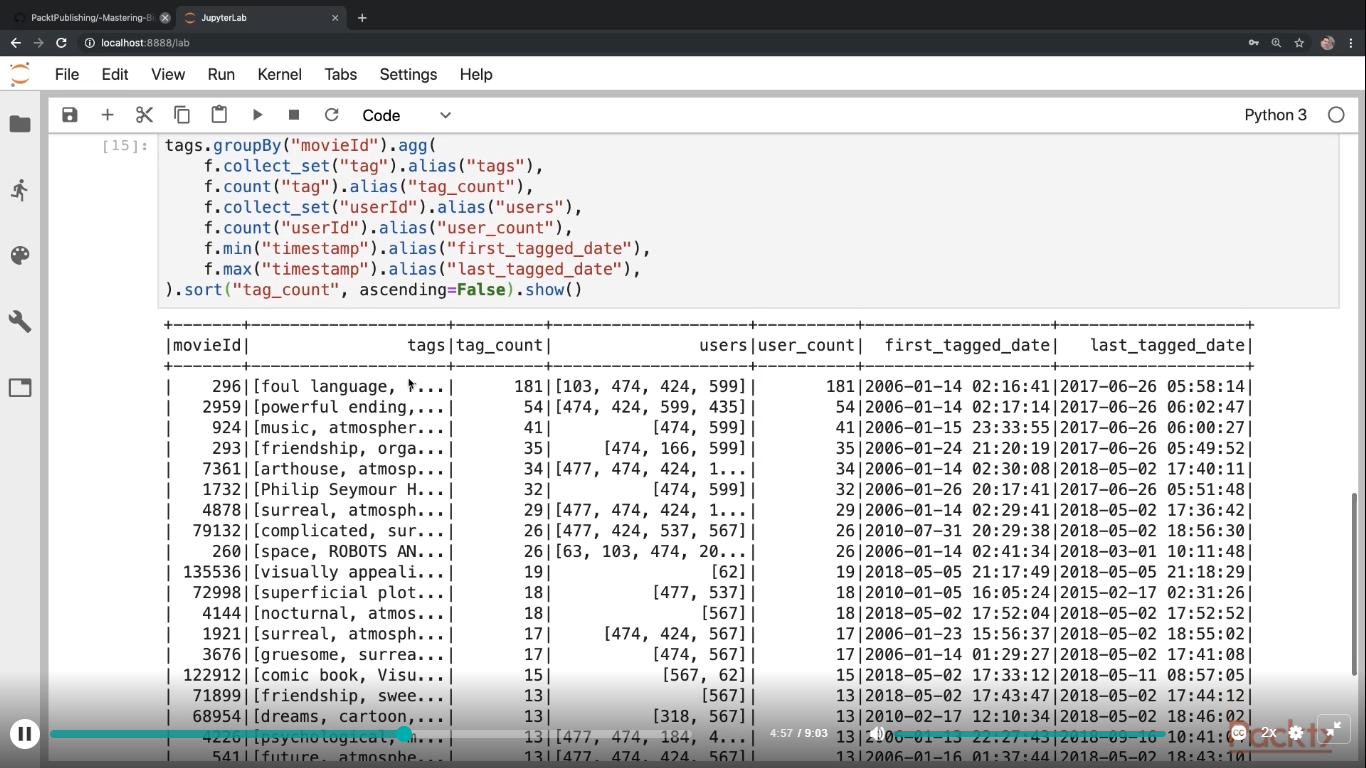

### ALS Recommender System

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as f

spark = SparkSession.builder.appName("als-recommender").getOrCreate()

In [ ]:
ratings = (
    spark.read.csv(
        path="/content/Mastering-Big-Data-Analytics-with-PySpark/data-sets/ml-latest-small/ratings.csv",
        sep=",",
        header=True,
        quote='"',
        schema="userId INT, movieId INT, rating DOUBLE, timestamp INT",
    )
    # .withColumn("timestamp", f.to_timestamp(f.from_unixtime("timestamp")))
    .drop("timestamp")
    .cache()
)

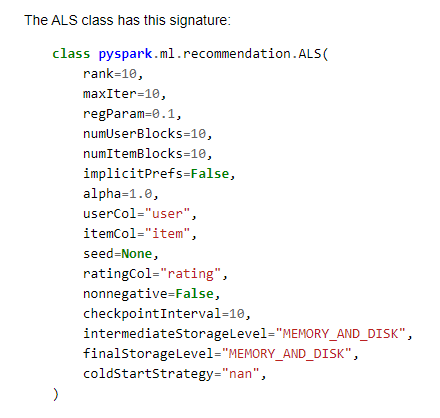

In [ ]:
from pyspark.ml.recommendation import ALS

In [ ]:
model = (
    ALS(
        userCol="userId",
        itemCol="movieId",
        ratingCol="rating",
    ).fit(ratings)
)

In [ ]:
predictions = model.transform(ratings)
predictions.show(10, False)

+------+-------+------+----------+
|userId|movieId|rating|prediction|
+------+-------+------+----------+
|191   |148    |5.0   |4.921467  |
|133   |471    |4.0   |3.1737905 |
|597   |471    |2.0   |3.9179363 |
|385   |471    |4.0   |2.9745612 |
|436   |471    |3.0   |3.6886308 |
|602   |471    |4.0   |3.6024406 |
|91    |471    |1.0   |2.3480353 |
|409   |471    |3.0   |3.8320298 |
|372   |471    |3.0   |2.9738774 |
|599   |471    |2.5   |2.7476397 |
+------+-------+------+----------+
only showing top 10 rows



In [ ]:
model.userFactors.show(5)

+---+--------------------+
| id|            features|
+---+--------------------+
| 10|[-0.028317755, 0....|
| 20|[-1.2629544, 0.57...|
| 30|[-0.64685774, -0....|
| 40|[-1.2631711, 0.46...|
| 50|[-0.96600693, -0....|
+---+--------------------+
only showing top 5 rows



In [ ]:
model.itemFactors.show(5)

+---+--------------------+
| id|            features|
+---+--------------------+
| 10|[-0.96596885, 0.0...|
| 20|[-0.43237323, -0....|
| 30|[-0.8408578, -0.2...|
| 40|[-0.20028046, -0....|
| 50|[-1.3041071, 0.09...|
+---+--------------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
als = ALS(
    userCol="userId",
    itemCol="movieId",
    ratingCol="rating",
)

(training_data, validation_data) = ratings.randomSplit([8.0, 2.0])

evaluator = RegressionEvaluator(
    metricName="rmse", labelCol="rating", predictionCol="prediction"
)

model = als.fit(training_data)
predictions = model.transform(validation_data)

In [ ]:
predictions.show(10, False)

+------+-------+------+----------+
|userId|movieId|rating|prediction|
+------+-------+------+----------+
|218   |471    |4.0   |3.1557236 |
|217   |471    |2.0   |2.904364  |
|136   |471    |4.0   |3.0653472 |
|273   |471    |5.0   |4.178053  |
|287   |471    |4.5   |2.9642751 |
|469   |471    |5.0   |3.2853742 |
|191   |496    |5.0   |NaN       |
|159   |1088   |4.0   |2.7479868 |
|599   |1088   |2.5   |2.4010575 |
|169   |1088   |4.5   |4.196451  |
+------+-------+------+----------+
only showing top 10 rows



In [ ]:
rmse = evaluator.evaluate(predictions.na.drop())
print(rmse)

0.8793350703923346


In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

parameter_grid = (
    ParamGridBuilder()
    .addGrid(als.rank, [1, 5, 10])
    .addGrid(als.maxIter, [20])
    .addGrid(als.regParam, [0.05, 0.1])
    .build()
)

In [ ]:
from pprint import pprint

pprint(parameter_grid)

[{Param(parent='ALS_3a101ba5e05e', name='maxIter', doc='max number of iterations (>= 0).'): 20,
  Param(parent='ALS_3a101ba5e05e', name='regParam', doc='regularization parameter (>= 0).'): 0.05,
  Param(parent='ALS_3a101ba5e05e', name='rank', doc='rank of the factorization'): 1},
 {Param(parent='ALS_3a101ba5e05e', name='maxIter', doc='max number of iterations (>= 0).'): 20,
  Param(parent='ALS_3a101ba5e05e', name='regParam', doc='regularization parameter (>= 0).'): 0.1,
  Param(parent='ALS_3a101ba5e05e', name='rank', doc='rank of the factorization'): 1},
 {Param(parent='ALS_3a101ba5e05e', name='maxIter', doc='max number of iterations (>= 0).'): 20,
  Param(parent='ALS_3a101ba5e05e', name='regParam', doc='regularization parameter (>= 0).'): 0.05,
  Param(parent='ALS_3a101ba5e05e', name='rank', doc='rank of the factorization'): 5},
 {Param(parent='ALS_3a101ba5e05e', name='maxIter', doc='max number of iterations (>= 0).'): 20,
  Param(parent='ALS_3a101ba5e05e', name='regParam', doc='regul

In [ ]:
crossvalidator = CrossValidator(
    estimator=als,
    estimatorParamMaps=parameter_grid,
    evaluator=evaluator,
    numFolds=2,
)

crossval_model = crossvalidator.fit(training_data)
predictions = crossval_model.transform(validation_data)

In [ ]:
rmse = evaluator.evaluate(predictions.na.drop())
print(rmse)

1.014127339763445


In [ ]:
model = crossval_model.bestModel

### MLlib data source APIs

Vectors and Matrices

In [ ]:
import numpy as np
import scipy.sparse as sps
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors
from pyspark.ml.linalg import Matrix, Matrices

spark = SparkSession.builder.getOrCreate()

# Use a NumPy array as a dense vector.
dv1 = np.array([1.0, 0.0, 3.0])
# Use a Python list as a dense vector.
dv2 = [1.0, 0.0, 3.0]
print("Dense vector 1:", dv1)
print("Dense vector 2:", dv2)

# Create a SparseVector.
sv1 = Vectors.sparse(3, [0, 2], [1.0, 3.0])
# Use a single-column SciPy csc_matrix as a sparse vector.
sv2 = sps.csc_matrix((np.array([1.0, 3.0]), np.array([0, 2]), np.array([0, 2])), shape=(3, 1))
print("Sparse vector 1:", sv1)
print("Sparse vector 2:", sv2)

# Create a dense matrix
dm = Matrices.dense(3, 2, [1, 3, 5, 2, 4, 6])
# Create a sparse matrix
sm = Matrices.sparse(3, 2, [0, 1, 3], [0, 2, 1], [9, 6, 8])
print("Dense matrix:", dm)
print("Sparse matrix:", sm)

Dense vector 1: [1. 0. 3.]
Dense vector 2: [1.0, 0.0, 3.0]
Sparse vector 1: (3,[0,2],[1.0,3.0])
Sparse vector 2:   (0, 0)	1.0
  (2, 0)	3.0
Dense matrix: DenseMatrix([[1., 2.],
             [3., 4.],
             [5., 6.]])
Sparse matrix: 3 X 2 CSCMatrix
(0,0) 9.0
(2,1) 6.0
(1,1) 8.0


Images

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

PATH = "./spark-3.0.2-bin-hadoop3.2/data/mllib/images/origin/kittens"
df = (
    spark.read.format("image")
    .option("dropInvalid", True)
    .load(PATH)
    .select("image.origin", "image.height", "image.width", "image.nChannels", "image.mode", "image.data")
)
df.toPandas()

,origin,height,width,nChannels,mode,data
0,file:///content/Mastering-Big-Data-Analytics-w...,311,300,3,16,"[193, 193, 193, 194, 194, 194, 194, 194, 194, ..."
1,file:///content/Mastering-Big-Data-Analytics-w...,313,199,3,16,"[208, 229, 237, 202, 223, 231, 210, 231, 239, ..."
2,file:///content/Mastering-Big-Data-Analytics-w...,200,300,3,16,"[88, 93, 96, 88, 93, 96, 88, 93, 96, 89, 94, 9..."
3,file:///content/Mastering-Big-Data-Analytics-w...,296,300,3,16,"[203, 230, 244, 202, 229, 243, 201, 228, 242, ..."


libSVM

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

PATH = "./spark-3.0.2-bin-hadoop3.2/data/mllib/sample_libsvm_data.txt"

df = spark.read.format("libsvm").option("numFeatures", "780").load(PATH)
df.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(780,[127,128,129...|
|  1.0|(780,[158,159,160...|
|  1.0|(780,[124,125,126...|
|  1.0|(780,[152,153,154...|
|  1.0|(780,[151,152,153...|
|  0.0|(780,[129,130,131...|
|  1.0|(780,[158,159,160...|
|  1.0|(780,[99,100,101,...|
|  0.0|(780,[154,155,156...|
|  0.0|(780,[127,128,129...|
|  1.0|(780,[154,155,156...|
|  0.0|(780,[153,154,155...|
|  0.0|(780,[151,152,153...|
|  1.0|(780,[129,130,131...|
|  0.0|(780,[154,155,156...|
|  1.0|(780,[150,151,152...|
|  0.0|(780,[124,125,126...|
|  0.0|(780,[152,153,154...|
|  1.0|(780,[97,98,99,12...|
|  1.0|(780,[124,125,126...|
+-----+--------------------+
only showing top 20 rows



### NLP and Hyperparameter Tuning in PySpark

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Prepare training documents, which are labeled.
training_data = [
    (0, "a b c d e spark", 1.0),
    (1, "b d", 0.0),
    (2, "spark f g h", 1.0),
    (3, "hadoop mapreduce", 0.0),
    (4, "b spark who", 1.0),
    (5, "g d a y", 0.0),
    (6, "spark fly", 1.0),
    (7, "was mapreduce", 0.0),
    (8, "e spark program", 1.0),
    (9, "a e c l", 0.0),
    (10, "spark compile", 1.0),
    (11, "hadoop software", 0.0),
]
training = spark.createDataFrame(training_data, ["id", "text", "label"])
print("Dataset used for training (labeled):")
training.show()

# Prepare test documents, which are unlabeled.
test_data = [
    (4, "spark i j k"),
    (5, "l m n"),
    (6, "mapreduce spark"),
    (7, "apache hadoop"),
]
test = spark.createDataFrame(test_data, ["id", "text"],)
print("Dataset used for testing (unlabeled):")
test.show()

Dataset used for training (labeled):
+---+----------------+-----+
| id|            text|label|
+---+----------------+-----+
|  0| a b c d e spark|  1.0|
|  1|             b d|  0.0|
|  2|     spark f g h|  1.0|
|  3|hadoop mapreduce|  0.0|
|  4|     b spark who|  1.0|
|  5|         g d a y|  0.0|
|  6|       spark fly|  1.0|
|  7|   was mapreduce|  0.0|
|  8| e spark program|  1.0|
|  9|         a e c l|  0.0|
| 10|   spark compile|  1.0|
| 11| hadoop software|  0.0|
+---+----------------+-----+

Dataset used for testing (unlabeled):
+---+---------------+
| id|           text|
+---+---------------+
|  4|    spark i j k|
|  5|          l m n|
|  6|mapreduce spark|
|  7|  apache hadoop|
+---+---------------+



In [ ]:
# Configure an ML pipeline, which consists of tree stages: tokenizer, hashingTF, and lr.
tokenizer = Tokenizer(inputCol="text", outputCol="words")
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features")
lr = LogisticRegression(maxIter=10)
pipeline = Pipeline(stages=[tokenizer, hashingTF, lr])

# We now treat the Pipeline as an Estimator, wrapping it in a CrossValidator instance.
# This will allow us to jointly choose parameters for all Pipeline stages.
# A CrossValidator requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
# We use a ParamGridBuilder to construct a grid of parameters to search over.
# With 3 values for hashingTF.numFeatures and 2 values for lr.regParam,
# this grid will have 3 x 2 = 6 parameter settings for CrossValidator to choose from.
paramGrid = (
    ParamGridBuilder()
    .addGrid(hashingTF.numFeatures, [10, 100, 1000])
    .addGrid(lr.regParam, [0.1, 0.01])
    .build()
)

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=paramGrid,
    evaluator=BinaryClassificationEvaluator(),
    numFolds=2,
)  # use 3+ folds in practice

# Run cross-validation, and choose the best set of parameters.
cvModel = crossval.fit(training)

# Make predictions on test documents. cvModel uses the best model found (lrModel).
prediction = cvModel.transform(test)
selected = prediction.select("id", "text", "probability", "prediction")
selected.show(100, False)

+---+---------------+----------------------------------------+----------+
|id |text           |probability                             |prediction|
+---+---------------+----------------------------------------+----------+
|4  |spark i j k    |[0.2661287892091301,0.7338712107908699] |1.0       |
|5  |l m n          |[0.9209302389399868,0.07906976106001318]|0.0       |
|6  |mapreduce spark|[0.4429343598469927,0.5570656401530073] |1.0       |
|7  |apache hadoop  |[0.8583692828862762,0.14163071711372377]|0.0       |
+---+---------------+----------------------------------------+----------+



## Twitter Sentiment Analysis

### Environment Setup

In [ ]:
import pandas as pd
from IPython.core.display import display
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark.sql import functions as f

# General settings for display purposes
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = 144
sns.set(color_codes=True)

In [ ]:
spark = SparkSession.builder.getOrCreate()

# Source sentiment140: http://help.sentiment140.com/for-students/
schema = "polarity FLOAT, id LONG, date_time STRING, query STRING, user STRING, text STRING"
spark_reader = spark.read.schema(schema)

# file 1: testdata.manual.2009.06.14.csv
TESTDATA_PATH = ("./data-sets/sentiment-140-training-data/testdata.manual.2009.06.14.csv")
raw_test_data = spark_reader.csv(
    TESTDATA_PATH,
    quote='"',
    header=False,
    inferSchema=True,
    columnNameOfCorruptRecord="corrupt_data",
).cache()

# file 2: training.1600000.processed.noemoticon.csv
TRAININGDATA_PATH = "./data-sets/sentiment-140-training-data/training.1600000.processed.noemoticon.csv"
raw_training_data = spark_reader.csv(
    TRAININGDATA_PATH,
    quote='"',
    header=False,
    inferSchema=True,
    columnNameOfCorruptRecord="corrupt_data",
).cache()

# path that we will write our raw data to
OUTPUT_PATH = ("./data-sets/sentiment-140-training-data/RAW")

### Data Exploration

In [ ]:
# Count of data
print(f"Overall data count: {raw_test_data.count()}")

# Data summary
display(raw_test_data.summary().toPandas())
print("Data schema")
raw_test_data.printSchema()

# Let's look at 50 rows of data
display(raw_test_data.limit(50).toPandas())

Overall data count: 498


,summary,polarity,id,date_time,query,user,text
0,count,498,498,498,498,498,498
1,mean,2.0200803212851404,1867.2269076305222,None,46.0,None,None
2,stddev,1.6996858490577658,2834.891681137318,None,5.163977794943222,None,None
3,min,0.0,3,Fri May 15 06:45:54 UTC 2009,"""""""booz allen""""""",5x1llz,"""""""The Republican party is a bunch of anti-abo..."
4,25%,0.0,388,None,40.0,None,None
5,50%,2.0,1013,None,50.0,None,None
6,75%,4.0,2367,None,50.0,None,None
7,max,4.0,14076,Wed May 27 23:59:18 UTC 2009,yankees,zedomax,zomg!!! I have a G2!!!!!!!


Data schema
root
 |-- polarity: float (nullable = true)
 |-- id: long (nullable = true)
 |-- date_time: string (nullable = true)
 |-- query: string (nullable = true)
 |-- user: string (nullable = true)
 |-- text: string (nullable = true)



,polarity,id,date_time,query,user,text
0,4.0,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4.0,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4.0,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4.0,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4.0,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
5,4.0,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...
6,0.0,9,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non lo...
7,4.0,10,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.
8,4.0,11,Mon May 11 03:27:15 UTC 2009,twitter,PJ_King,Loves twitter
9,4.0,12,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes abo...


In [ ]:
# Count of data
print(f"Overall data count: {raw_training_data.count()}")

# Data summary
display(raw_training_data.summary().toPandas())
print("Data schema")
raw_training_data.printSchema()

# Let's look at 50 rows of data
display(raw_training_data.limit(50).toPandas())

Overall data count: 1600000


,summary,polarity,id,date_time,query,user,text
0,count,1600000,1600000,1600000,1600000,1600000,1600000
1,mean,2.0,1.9988175522956276E9,None,None,4.325887521835714E9,None
2,stddev,2.0000006250002933,1.9357607362269536E8,None,None,5.1627332184548904E10,None
3,min,0.0,1467810369,Fri Apr 17 20:30:31 PDT 2009,NO_QUERY,000catnap000,exh...
4,25%,0.0,1956912288,None,None,32508.0,None
5,50%,0.0,2002093413,None,None,130587.0,None
6,75%,4.0,2177045846,None,None,1100101.0,None
7,max,4.0,2329205794,Wed May 27 07:27:38 PDT 2009,NO_QUERY,zzzzeus111,�����ߧ�ǿ�����ж�؜��� &lt;&lt;----I DID NOT KNOW...


Data schema
root
 |-- polarity: float (nullable = true)
 |-- id: long (nullable = true)
 |-- date_time: string (nullable = true)
 |-- query: string (nullable = true)
 |-- user: string (nullable = true)
 |-- text: string (nullable = true)



,polarity,id,date_time,query,user,text
0,0.0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0.0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0.0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0.0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0.0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0.0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0.0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0.0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0.0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0.0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


Initial Findings

- We need to apply a proper schema
- The date column needs fixing
- We need to extract twitter user names/handles (we'll extract it and call the output column `users_mentioned`)
- We need to extract hashtags and replace them with the words from the hashtag (we'll extract it and call the output column `hashtags`)
- We need to extract URLs, as our algorithm won't need that or use that (we'll simply remove it from the data)
- The same goes for email-address
- HTML does not appear properly unescaped, we're going to have to fix that (example: `&lt;3` and `s&amp;^t`)
- Encoding seems to be 'broken' (example: `�����ߧ�ǿ�����ж�؜��� &lt;&lt;----I DID NOT KNOW I CUD or HOW TO DO ALL DAT ON MY PHONE TIL NOW. WOW..MY LIFE IS NOW COMPLETE. JK.`)

No of rows with Polarity: 1600000 / 1600000


,polarity,count
0,4.0,800000
1,0.0,800000


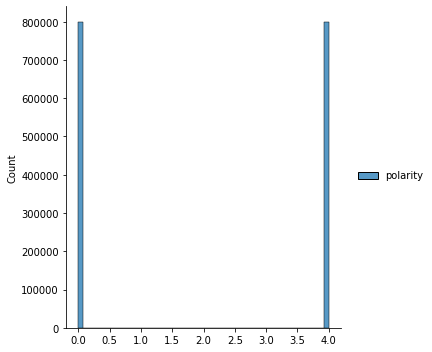

In [ ]:
df = raw_training_data.select("polarity").na.drop()
print(f"No of rows with Polarity: {df.count()} / {raw_training_data.count()}")

display(df.groupBy("polarity").count().toPandas())
sns.displot(df.toPandas());

Store our raw data
- keep the format CSV
- partition the data by polarity, this will create 2 subfolders inside our output folder
- repartition the data in 20 partitions: This will ensure that we have 20 smaller csv files per partition
- As 498 rows is way too little for us to train a model on, we're going to disregard this dataset and focus on the Training Data

In [ ]:
raw_training_data.repartition(20).write.partitionBy("polarity").csv(OUTPUT_PATH, mode="overwrite")

### Data Wrangling

[notebook](https://nbviewer.jupyter.org/github/PacktPublishing/Mastering-Big-Data-Analytics-with-PySpark/blob/master/Section%206%20-%20Analyzing%20Big%20Data/6.3/data_wrangling.ipynb)

In [ ]:
import html
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql import functions as f

spark = SparkSession.builder.appName("DataCleaning").getOrCreate()

pd.options.display.max_columns = None
pd.options.display.max_rows = 250
pd.options.display.max_colwidth = 150

schema = "polarity FLOAT, id LONG, date_time TIMESTAMP, query STRING, user STRING, text STRING"
timestampformat = "EEE MMM dd HH:mm:ss zzz yyyy"

IN_PATH = "./data-sets/sentiment-140-training-data/RAW"
OUT_PATH = "./data-sets/sentiment-140-training-data/CLEAN"

spark_reader = spark.read.schema(schema)

url_regex = r"((https?|ftp|file):\/{2,3})+([-\w+&@#/%=~|$?!:,.]*)|(www.)+([-\w+&@#/%=~|$?!:,.]*)"
email_regex = r"[\w.-]+@[\w.-]+\.[a-zA-Z]{1,}"
user_regex = r"(@\w{1,15})"
hashtag_regex = "(#\w{1,})"
hashtag_replace_regex = "#(\w{1,})"

@f.udf
def html_unescape(s: str):
    if isinstance(s, str):
        return html.unescape(s)
    return s


def clean_data(df):
    df = (
        df
        .withColumn("original_text", f.col("text"))
        .withColumn("text", f.regexp_replace(f.col("text"), url_regex, ""))
        .withColumn("text", f.regexp_replace(f.col("text"), email_regex, ""))
        .withColumn("text", f.regexp_replace(f.col("text"), user_regex, ""))
        .withColumn("text", f.regexp_replace(f.col("text"), "#", " "))
        .withColumn("text", html_unescape(f.col("text")))
        .filter("text != ''")
    )
    return df

df_raw = spark_reader.csv(IN_PATH, timestampFormat=timestampformat) 
df_clean = clean_data(df_raw)

df_clean.write.partitionBy("polarity").parquet(OUT_PATH, mode="overwrite")